In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
test_data_orig = pd.read_csv(os.path.join('data', 'loanDataTest.csv'))
pd.set_option('display.max_columns', None)
#test_data_orig

In [3]:
train_data_orig = pd.read_csv(os.path.join('data', 'loanDataTrain.csv'))
pd.set_option('display.max_columns', None)
#train_data_orig

In [4]:
#Check values in test and train sets
test_Gender = test_data_orig.Gender.unique()
train_Gender = train_data_orig.Gender.unique()
test_Dependents = test_data_orig.Dependents.unique()
train_Dependents = train_data_orig.Dependents.unique()
test_Education = test_data_orig.Education.unique()
train_Education = train_data_orig.Education.unique()
test_Self_Employed = test_data_orig.Self_Employed.unique()
train_Self_Employed = train_data_orig.Self_Employed.unique()
test_ApplicantIncome = test_data_orig.ApplicantIncome.unique()
train_ApplicantIncome = train_data_orig.ApplicantIncome.unique()
test_CoapplicantIncome = test_data_orig.CoapplicantIncome.unique()
train_CoapplicantIncome = train_data_orig.CoapplicantIncome.unique()
test_LoanAmount = test_data_orig.LoanAmount.unique()
train_LoanAmount = train_data_orig.LoanAmount.unique()
test_Loan_Amount_Term = test_data_orig.Loan_Amount_Term.unique()
train_Loan_Amount_Term = train_data_orig.Loan_Amount_Term.unique()
test_Credit_History = test_data_orig.Credit_History.unique()
train_Credit_History = train_data_orig.Credit_History.unique()
test_Property_Area = test_data_orig.Property_Area.unique()
train_Property_Area = train_data_orig.Property_Area.unique()

train_Loan_Status = train_data_orig.Loan_Status.unique()

#Print out values
#test_Gender, train_Gender, test_Dependents, train_Dependents, test_Education, train_Education, test_Self_Employed, train_Self_Employed, test_ApplicantIncome, train_ApplicantIncome, test_CoapplicantIncome, train_CoapplicantIncome, test_LoanAmount, train_LoanAmount, test_Loan_Amount_Term, train_Loan_Amount_Term, test_Credit_History, train_Credit_History, test_Property_Area, train_Property_Area, train_Loan_Status

In [5]:
#drop nans
test_data = test_data_orig.dropna(axis=0)
train_data_pre_dummy = train_data_orig.dropna(axis=0)

test_Gender = test_data.Gender.unique()
train_Gender = train_data_pre_dummy.Gender.unique()
test_Dependents = test_data.Dependents.unique()
train_Dependents = train_data_pre_dummy.Dependents.unique()
test_Education = test_data.Education.unique()
train_Education = train_data_pre_dummy.Education.unique()
test_Self_Employed = test_data.Self_Employed.unique()
train_Self_Employed = train_data_pre_dummy.Self_Employed.unique()
test_ApplicantIncome = test_data.ApplicantIncome.unique()
train_ApplicantIncome = train_data_pre_dummy.ApplicantIncome.unique()
test_CoapplicantIncome = test_data.CoapplicantIncome.unique()
train_CoapplicantIncome = train_data_pre_dummy.CoapplicantIncome.unique()
test_LoanAmount = test_data.LoanAmount.unique()
train_LoanAmount = train_data_pre_dummy.LoanAmount.unique()
test_Loan_Amount_Term = test_data.Loan_Amount_Term.unique()
train_Loan_Amount_Term = train_data_pre_dummy.Loan_Amount_Term.unique()
test_Credit_History = test_data.Credit_History.unique()
train_Credit_History = train_data_pre_dummy.Credit_History.unique()
test_Property_Area = test_data.Property_Area.unique()
train_Property_Area = train_data_pre_dummy.Property_Area.unique()

train_Loan_Status = train_data_pre_dummy.Loan_Status.unique()

#Print out categorical values
test_Gender, train_Gender, test_Dependents, train_Dependents, test_Education, train_Education, test_Self_Employed, train_Self_Employed, train_Loan_Amount_Term, test_Credit_History, train_Credit_History, test_Property_Area, train_Property_Area, train_Loan_Status

(array(['Male', 'Female'], dtype=object),
 array(['Male', 'Female'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['1', '0', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.]),
 array([1., 0.]),
 array([1., 0.]),
 array(['Urban', 'Semiurban', 'Rural'], dtype=object),
 array(['Rural', 'Urban', 'Semiurban'], dtype=object),
 array(['N', 'Y'], dtype=object))

In [6]:
#Make loan status a dummy variable, drop the "N" column
train_data = pd.get_dummies(train_data_pre_dummy, prefix=['Loan_Status'], columns=['Loan_Status'])
train_data.drop('Loan_Status_N', axis=1, inplace=True)
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [7]:
#Replace "3+" in dependents with "3" - not perfect, but easier to deal with
train_data = train_data.replace(['3+'],'3')
test_data = test_data.replace(['3+'],'3')

In [8]:
#Limited dummy variables
train_data_limit_dummies = pd.get_dummies(train_data, prefix=['Gender'], columns=['Gender'])
train_data_limit_dummies.drop('Gender_Male', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data, prefix=['Gender'], columns=['Gender'])
test_data_limit_dummies.drop('Gender_Male', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Education'], columns=['Education'])
train_data_limit_dummies.drop('Education_Not Graduate', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Education'], columns=['Education'])
test_data_limit_dummies.drop('Education_Not Graduate', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Married'], columns=['Married'])
train_data_limit_dummies.drop('Married_No', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Married'], columns=['Married'])
test_data_limit_dummies.drop('Married_No', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Self_Employed'], columns=['Self_Employed'])
train_data_limit_dummies.drop('Self_Employed_No', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Self_Employed'], columns=['Self_Employed'])
test_data_limit_dummies.drop('Self_Employed_No', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Credit_History'], columns=['Credit_History'])
train_data_limit_dummies.drop('Credit_History_0.0', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Credit_History'], columns=['Credit_History'])
test_data_limit_dummies.drop('Credit_History_0.0', axis=1, inplace=True)

train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Property_Area'], columns=['Property_Area'])
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Property_Area'], columns=['Property_Area'])

train_data_limit_dummies

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status_Y,Gender_Female,Education_Graduate,Married_Yes,Self_Employed_Yes,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,4583,1508.0,128.0,360.0,0,0,1,1,0,1,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1,0,1,1,1,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1,0,0,1,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1,0,1,0,0,1,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1,1,1,0,0,1,1,0,0
610,LP002979,3,4106,0.0,40.0,180.0,1,0,1,1,0,1,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1,0,1,1,0,1,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1,0,1,1,0,1,0,0,1


## Grid Search

### 1 (less_dummies) param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]}, random state 33, all columns - some improvement on more_dummies version

In [53]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=33)
model = SVC(kernel='linear', cache_size=1000)

In [55]:
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

In [56]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed: 38.7min remaining: 19.3min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 62.5min finished


GridSearchCV(estimator=SVC(cache_size=1000, kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [57]:
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001}


In [58]:
predictions = grid.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=["Denied", "Approved"]))

              precision    recall  f1-score   support

      Denied       0.87      0.33      0.48        39
    Approved       0.75      0.98      0.85        81

    accuracy                           0.77       120
   macro avg       0.81      0.65      0.67       120
weighted avg       0.79      0.77      0.73       120



Run 1 (limit dummies) summary

GridSearchCV(estimator=SVC(cache_size=1000, kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)
             
Best parameters: {'C': 5, 'gamma': 0.0001}

              precision    recall  f1-score   support

      Denied       0.87      0.33      0.48        39
    Approved       0.75      0.98      0.85        81

    accuracy                           0.77       120
   macro avg       0.81      0.65      0.67       120
weighted avg       0.79      0.77      0.73       120

### 2 (less dummies). param_grid={'C': [1, 5, 10], 'gamma': [0.00001, 0.0001, 0.001]}, random state 33, all columns - no discernable change from #1

In [59]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=33)
model = SVC(kernel='linear', cache_size=1000)

In [61]:
param_grid = {'C': [1, 5, 10],
              'gamma': [0.00001, 0.0001, 0.001]}
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

In [62]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed: 59.8min remaining: 29.9min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 82.0min finished


GridSearchCV(estimator=SVC(cache_size=1000, kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': [1e-05, 0.0001, 0.001]},
             verbose=3)

In [63]:
print(grid.best_params_)

{'C': 5, 'gamma': 1e-05}


In [64]:
predictions = grid.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=["Denied", "Approved"]))

              precision    recall  f1-score   support

      Denied       0.87      0.33      0.48        39
    Approved       0.75      0.98      0.85        81

    accuracy                           0.77       120
   macro avg       0.81      0.65      0.67       120
weighted avg       0.79      0.77      0.73       120



Run 2 (limit dummies) summary

GridSearchCV(estimator=SVC(cache_size=1000, kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'gamma': [1e-05, 0.0001, 0.001]},
             verbose=3)
Best parameters: {'C': 5, 'gamma': 1e-05}

              precision    recall  f1-score   support

      Denied       0.87      0.33      0.48        39
    Approved       0.75      0.98      0.85        81

    accuracy                           0.77       120
   macro avg       0.81      0.65      0.67       120
weighted avg       0.79      0.77      0.73       120

### 3 (less dummies). From https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py: nested vs. non-nested cross-validation -  param_grid={'C': [1, 5, 10], 'gamma': [0.00001, 0.0001, 0.001]} . Non-nested slightly higher, scores a little higher than with data_more_dummies

In [66]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

In [67]:
NUM_TRIALS = 30

In [68]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [69]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [70]:
p_grid = {"C": [1, 5, 10],
          "gamma": [0.00001, 0.0001, 0.001]}

In [71]:
svm = SVC(kernel="rbf", cache_size=1000)

In [72]:
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

In [73]:
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, verbose=2, n_jobs=-1)
    clf.fit(data, target)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=data, y=target, cv=outer_cv, verbose=2, n_jobs=-1)
    nested_scores[i] = nested_score.mean()

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    6.8s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s finished


In [74]:
score_difference = non_nested_scores - nested_scores

In [75]:
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

Average difference of 0.006944 with std. dev. of 0.006896.


Text(0.5, 1.1, 'Non-Nested and Nested Cross Validation on train_data_limit_dummies')

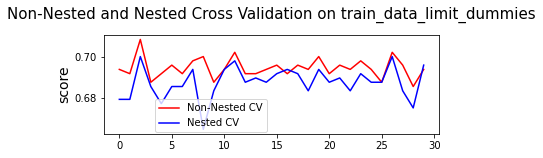

In [76]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on train_data_limit_dummies",
          x=.5, y=1.1, fontsize="15")

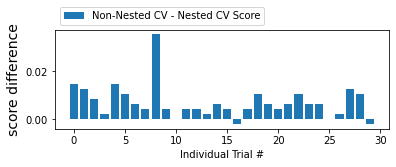

In [77]:
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

Run 3 summary

NUM_TRIALS = 30
Average difference of 0.006944 with std. dev. of 0.006896.

### 4 (less dummies). Nested vs. non-nested - param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]}. Non-nested slightly higher, scores a little higher than with data_more_dummies

In [78]:
NUM_TRIALS = 30

In [79]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [80]:
p_grid = {"C": [1, 5, 10],
          "gamma": [0.0001, 0.001, 0.01]}

In [81]:
svm = SVC(kernel="rbf", cache_size=1000)

In [82]:
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

In [83]:
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, verbose=2, n_jobs=-1)
    clf.fit(data, target)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=data, y=target, cv=outer_cv, verbose=2, n_jobs=-1)
    nested_scores[i] = nested_score.mean()

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s finished


In [84]:
score_difference = non_nested_scores - nested_scores

In [85]:
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

Average difference of 0.008819 with std. dev. of 0.004862.


Text(0.5, 1.1, 'Non-Nested and Nested Cross Validation on train_data_limit_dummies')

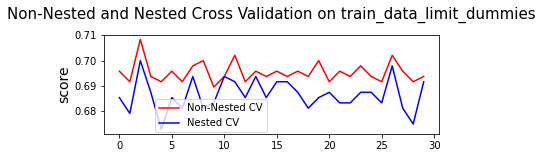

In [86]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on train_data_limit_dummies",
          x=.5, y=1.1, fontsize="15")

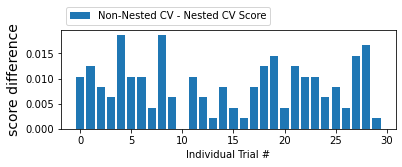

In [87]:
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

Run 4 summary

NUM_TRIALS = 30
Average difference of 0.008819 with std. dev. of 0.004862.

### 5 (limit_dummies). Nested vs. non-nested - param_grid={'C': [1, 5, 10], 'gamma':  [0.00001, 0.0001, 0.001]}: As in #3, but with SVC(kernel="linear") rather than rbf -

In [88]:
# Data and parameters
NUM_TRIALS = 30
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns
p_grid = {"C": [1, 5, 10],
          "gamma": [0.00001, 0.0001, 0.001]}
svm = SVC(kernel="linear", cache_size=1000)
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

In [ ]:
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, verbose=2, n_jobs=-1)
    clf.fit(data, target)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=data, y=target, cv=outer_cv, verbose=2, n_jobs=-1)
    nested_scores[i] = nested_score.mean()

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed: 76.1min remaining: 38.0min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 83.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 106.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed: 52.8min remaining: 26.4min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 61.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 105.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed: 53.3min remaining: 26.6min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 59.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 87.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed: 75.9min remaining: 38.0min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 87.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 99.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed: 46.4min remaining: 23.2min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 79.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 77.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed: 18.7min remaining:  9.4min


In [ ]:
score_difference = non_nested_scores - nested_scores
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

In [ ]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on train_data_limit_dummies",
          x=.5, y=1.1, fontsize="15")

In [ ]:
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

Run 5 summary

### 6 (limited dummies). As #4 but with scaling and larger cache size. Nested vs. non-nested - param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]}, kernel = rbf: No nested/non-nested difference

https://scikit-learn.org/stable/modules/svm.html#svm-classification Kernel cache size: For SVC, SVR, NuSVC and NuSVR, the size of the kernel cache has a strong impact on run times for larger problems. If you have enough RAM available, it is recommended to set cache_size to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB). 

With 64 GB, I'd say I could go higher on the next run.

Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. REDO AT LEAST FOR MODELS THAT RUN In REASONABLE TIME

In [9]:
NUM_TRIALS = 30

In [10]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [11]:
data_scaler = MinMaxScaler().fit(data)
data_scaled = data_scaler.transform(data)

In [12]:
p_grid = {"C": [1, 5, 10],
          "gamma": [0.0001, 0.001, 0.01]}

In [13]:
svm = SVC(kernel="rbf", cache_size=1000)

In [14]:
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

In [15]:
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, verbose=2, n_jobs=-1)
    clf.fit(data_scaled, target)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=data_scaled, y=target, cv=outer_cv, verbose=2, n_jobs=-1)
    nested_scores[i] = nested_score.mean()

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:   14.0s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  36 | elapsed:    0.1s remaining:    0.5s


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished


In [16]:
score_difference = non_nested_scores - nested_scores

In [17]:
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

Average difference of 0.000000 with std. dev. of 0.000000.


Text(0.5, 1.1, 'Non-Nested and Nested Cross Validation on train_data_more_dummies')

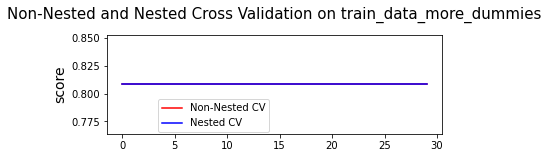

In [18]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on train_data_limit_dummies",
          x=.5, y=1.1, fontsize="15")

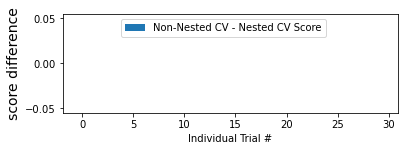

In [19]:
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

#Run 6 summary
NUM_TRIALS = 30
Average difference of 0.000208 with std. dev. of 0.001122.

### 7 (limited dummies). As #6 (limited dummies) but kernel="linear" 

In [20]:
NUM_TRIALS = 30

In [21]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [22]:
data_scaler = MinMaxScaler().fit(data)
data_scaled = data_scaler.transform(data)

In [23]:
p_grid = {"C": [1, 5, 10],
          "gamma": [0.0001, 0.001, 0.01]}

In [24]:
svm = SVC(kernel="linear", cache_size=1000)

In [25]:
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

In [26]:
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, verbose=2, n_jobs=-1)
    clf.fit(data_scaled, target)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=data_scaled, y=target, cv=outer_cv, verbose=2, n_jobs=-1)
    nested_scores[i] = nested_score.mean()

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished


In [27]:
score_difference = non_nested_scores - nested_scores

In [28]:
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

Average difference of 0.000000 with std. dev. of 0.000000.


Text(0.5, 1.1, 'Non-Nested and Nested Cross Validation on train_data_more_dummies')

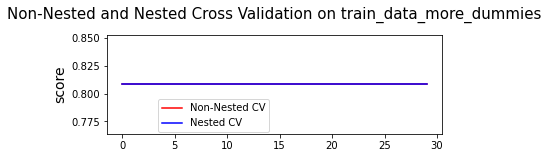

In [29]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on train_data_limit_dummies",
          x=.5, y=1.1, fontsize="15")

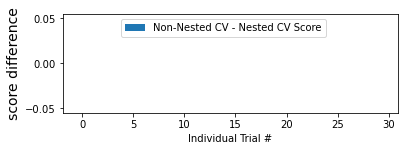

In [30]:
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

#Run 7 summary
NUM_TRIALS = 30
Average difference of 0.000000 with std. dev. of 0.000000.
Guess nested vs. not doesn't matter for linear as opposed to rbf, or anyway not here?

### 8 (limited dummies). As #7 (limited dummies) but starting with data edits: take out Loan_Amount_Term column. Scores overall a bit lower than in 7. No nested/non-nested difference

In [31]:
NUM_TRIALS = 30

In [32]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [33]:
data_scaler = MinMaxScaler().fit(data)
data_scaled = data_scaler.transform(data)

In [34]:
p_grid = {"C": [1, 5, 10],
          "gamma": [0.0001, 0.001, 0.01]}

In [35]:
svm = SVC(kernel="linear", cache_size=1000)

In [36]:
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

In [37]:
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, verbose=2, n_jobs=-1)
    clf.fit(data_scaled, target)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=data_scaled, y=target, cv=outer_cv, verbose=2, n_jobs=-1)
    nested_scores[i] = nested_score.mean()

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished


In [38]:
score_difference = non_nested_scores - nested_scores

In [39]:
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

Average difference of 0.000000 with std. dev. of 0.000000.


Text(0.5, 1.1, 'Non-Nested and Nested Cross Validation on train_data_more_dummies')

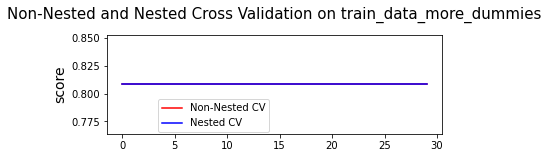

In [40]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on train_data_limit_dummies",
          x=.5, y=1.1, fontsize="15")

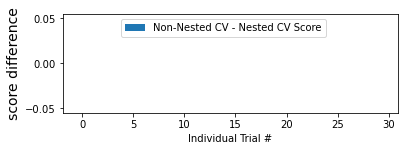

In [41]:
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

#Run 8 summary: Scores overall are a bit lower than in 7. Where nested/non-nested differ, non-nested is slightly higher.
NUM_TRIALS = 30
Average difference of 0.000625 with std. dev. of 0.001096.

### 9 (limited dummies). As #8 (limited dummies) but further data edits: take out Loan_Amount_Term and LoanAmount columns, since these could be considered results. No nested/non-nested difference.

In [42]:
NUM_TRIALS = 30

In [43]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'LoanAmount', 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [44]:
data_scaler = MinMaxScaler().fit(data)
data_scaled = data_scaler.transform(data)

In [45]:
p_grid = {"C": [1, 5, 10],
          "gamma": [0.0001, 0.001, 0.01]}

In [46]:
svm = SVC(kernel="linear", cache_size=1000)

In [47]:
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

In [48]:
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, verbose=2, n_jobs=-1)
    clf.fit(data_scaled, target)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=data_scaled, y=target, cv=outer_cv, verbose=2, n_jobs=-1)
    nested_scores[i] = nested_score.mean()

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  36 | elapsed:    0.1s remaining:    0.7s


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  24 out of  36 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.5s finished


In [49]:
score_difference = non_nested_scores - nested_scores

In [50]:
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

Average difference of 0.000000 with std. dev. of 0.000000.


Text(0.5, 1.1, 'Non-Nested and Nested Cross Validation on train_data_more_dummies')

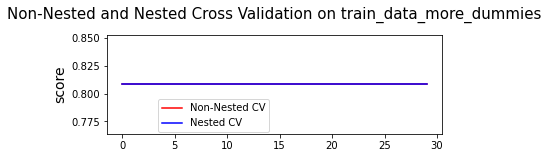

In [51]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on train_data_limit_dummies",
          x=.5, y=1.1, fontsize="15")

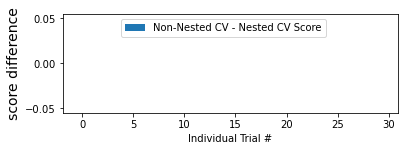

In [52]:
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

### Run 9 summary: 
NUM_TRIALS = 30
Scores overall a tiny bit lower than for models with more columns, no difference between nested and non-nested